#  Glass Classification Report

### ***note: all tables and figure should have a figure/table number and a legend

## Introduction

   Glass is a ubiquitous material that can be found at most crime scenes. The classification of glass fragments is an essential aspect of forensic investigation, particularly in cases that involve broken windows, bottles and/or any other glass objects that can be found present. It can provide crucial evidence that may help investigators identify suspects or even vindicate the innocent. Glass fragments can be found on clothing and vehicles in addition to being recovered from wounds and weapons. These fragments can provide valuable clues about the source, direction and nature of the impact that led to them to break, which can be useful to investigators when reconstructing the sequence of events leading up to the crime. However, not all glass is created equal, and the classification of glass is essential to determining its origin and potential significance as well as for ruling out false matches.

   An article written by Grzegorz Zadora titled Glass analysis for forensic purposes- a comparison of classification methods states that many forensic experts analyze glass fragments under 0.5mm, therefore they must be able to accurately collect the physico-chemical features of the glass, such as Refractive Index (RI) in addition to elemental analysis. By using Scanning Electron Microscopy that has been coupled with an Energy Dispersive X-ray spectrometer (SEM-EDX), the investigators are provided with the information of major and minor elements such as Al, Mg, K, Ca and Fe. Furthermore, it is believed that obtaining the information about such elements are extremely important when comparing and individualizing the glass fragments (Zadora, G. 2007).

    #talk here about what we obtain for data results.

   The dataset used was sourced from the UCI Machine Learning Repository. The chosen dataset, Glass Identification (German, B. 1987) comes from the USA Forensic Science Service and classifies 6 types of glass based on their oxide content, along with the refractive index of each glass observation. Float glass is a type of glass that is produced by floating molten glass on a bed of molten metal, usually tin. This process produces high quality and uniform glass with a smooth, thick, and flat surface (Campbell, I. 2001). Float glass is widely used for windows and doors due to their many benefits of resistance to heat and breakage. In this dataset, there is no data for “vehicle_windows_non_float_processed” glass.

<b>More details on the glass identification dataset:</b>

<b>Glass Oxides (measured in weight percent)</b>
<ul>
<li>Na: Sodium</li>
<li>Mg: Magnesium</li>
<li>Al: Aluminum</li>
<li>Si: Silicon</li>
<li>K: Potassium</li>
<li>Ca: Calcium</li>
<li>Ba: Barium</li>
<li>Fe: Iron</li>
</ul>
<b>Glass Types</b>
<ul>
<li>building_windows_float_processed</li>
<li>building_windows_non_float_processed</li>
<li>vehicle_windows_float_processed</li>
<li>vehicle_windows_non_float_processed (**none in this dataset**)</li>
<li>containers</li>
<li>tableware</li>
<li>headlamps</li>
</ul>

## Methods & Results

In [1]:
install.packages("themis")
library(tidyverse)
library(repr)
library(tidymodels)
library(themis)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks st

#### Load Data From the Original Source

Here we load the data from the original source with new column names and visualized a few rows of raw data `glass_data_raw`.

In [2]:
set.seed(999)

dataset_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
col_names <- c("id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "glass_type")
glass_data_raw <- read.table(dataset_url, sep =",", header = FALSE, col.names = col_names)

sample_n(glass_data_raw, 5)

id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
155,1.51694,12.86,3.58,1.31,72.61,0.61,8.79,0,0.00,3
68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0,0.17,1
61,1.51905,13.60,3.62,1.11,72.64,0.14,8.76,0,0.00,1
71,1.51574,14.86,3.67,1.74,71.87,0.16,7.36,0,0.12,2
105,1.52410,13.83,2.90,1.17,71.15,0.08,10.79,0,0.00,2


#### Wrangle and Clean the Data

Here we change the glass_type column to a factor type, remove the refractive index column (RI) and ID (id), and replace the glass_type numbers with their corresponding labels. We also visualize a few rows of `glass_data_processed`.

In [3]:
set.seed(999)

glass_data_raw <- glass_data_raw |> mutate(glass_type = as_factor(glass_type))
glass_type_names <- c("building_windows_float_processed", "building_windows_non_float_processed", "vehicle_windows_float_processed", "containers", "tableware", "headlamps")
glass_data_processed <- glass_data_raw |> select(-RI, -id)
levels(glass_data_processed$glass_type) <- glass_type_names

sample_n(glass_data_processed, 5)

Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
12.86,3.58,1.31,72.61,0.61,8.79,0,0.00,vehicle_windows_float_processed
13.05,3.65,0.87,72.32,0.19,9.85,0,0.17,building_windows_float_processed
13.60,3.62,1.11,72.64,0.14,8.76,0,0.00,building_windows_float_processed
14.86,3.67,1.74,71.87,0.16,7.36,0,0.12,building_windows_non_float_processed
13.83,2.90,1.17,71.15,0.08,10.79,0,0.00,building_windows_non_float_processed


#### Data Set Summary and Exploratory Data Analysis

**Glass Type Counts**<br>

Visualizing the glass type counts of the data set we can see that the observations of each glass type are not balanced. For examample there is a proporitionally high number of building_windows_float_processed observations and low tableware observations. This may lead to a bias towards our model predicting the higher count classes so to try and mitigate this we will use step_upsample from the themis package to balance the observations.

In [4]:
glass_type_counts <- glass_data_processed |>
    group_by(glass_type) |>
    summarize(count = n())

glass_type_counts

glass_type,count
<fct>,<int>
building_windows_float_processed,70
building_windows_non_float_processed,76
vehicle_windows_float_processed,17
containers,13
tableware,9
headlamps,29


**Average Weight Percent of Oxide per Glass Type**<br>

Here we visualize the average weight percentage of oxides for every glass type. This allows us to compare the average weight percent of each oxide between glass types.

Based on the visualization we can see **//TODO: write some stuff about how oxide types differ and maybe choose ones that differ to use in our predictors**

`summarise()` has grouped output by 'glass_type'. You can override using the
`.groups` argument.


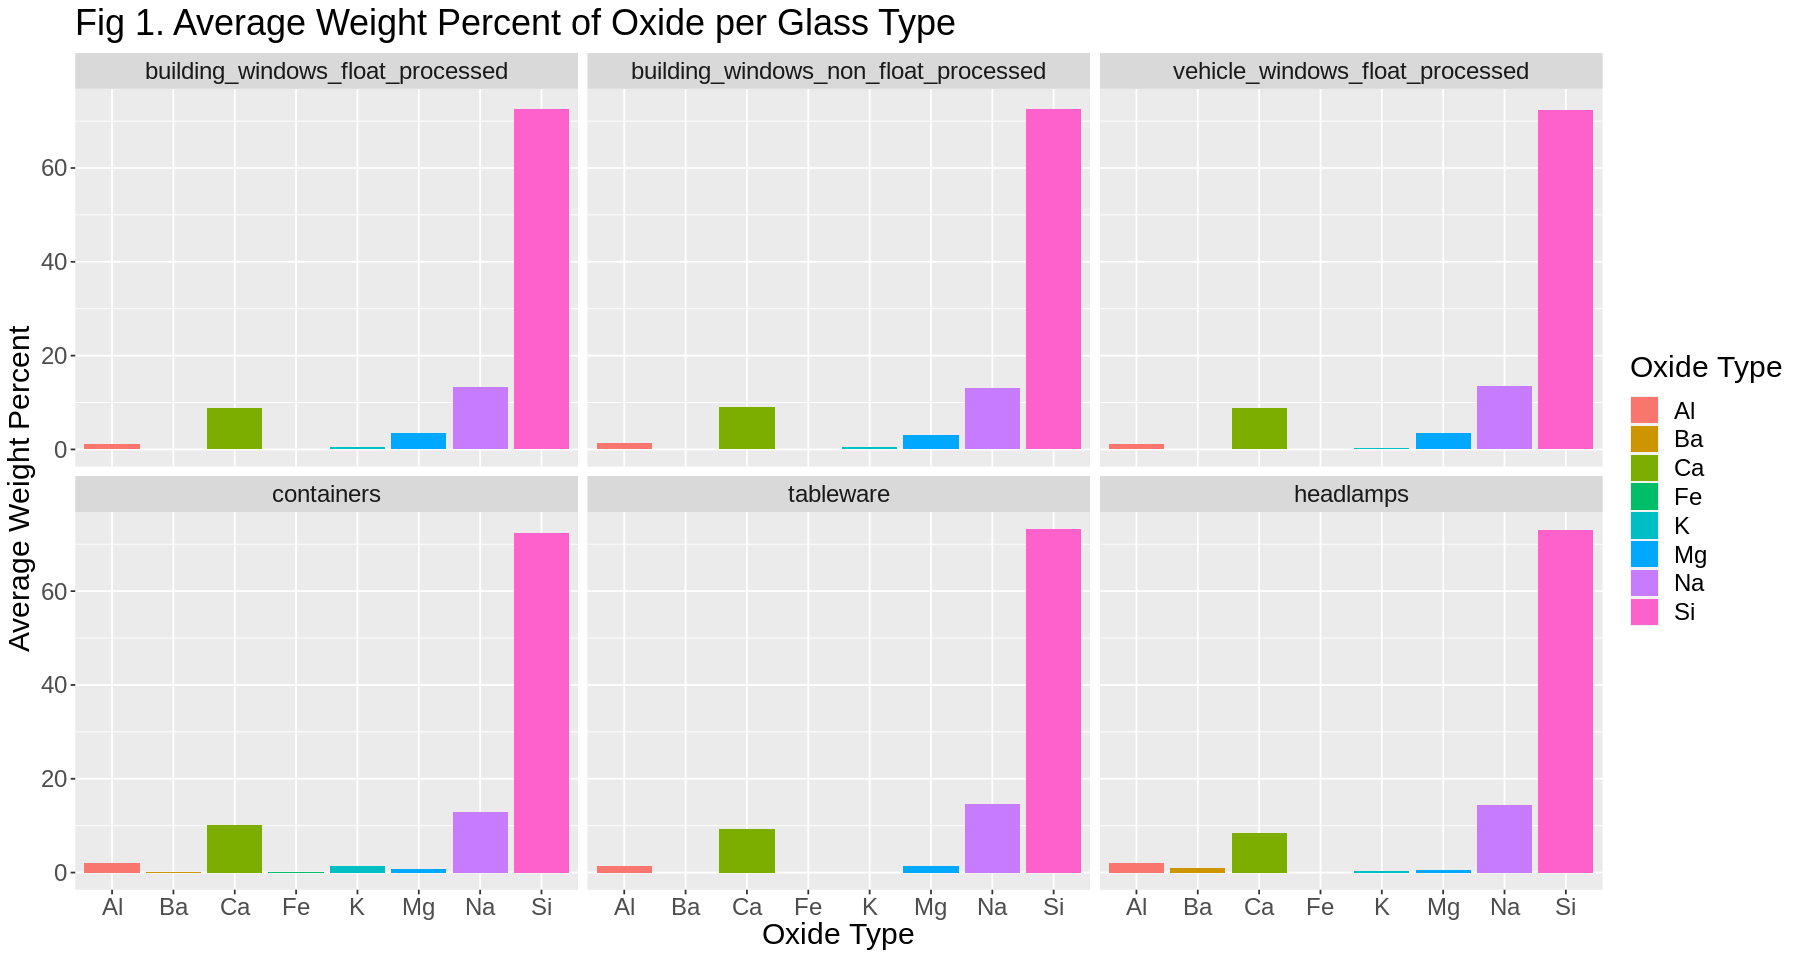

In [5]:
options(repr.plot.width=15, repr.plot.height=8)

glass_visual_data <- glass_data_processed |>
    pivot_longer(cols = Na:Fe, names_to = "oxide_type", values_to = "weight_percent") |>
    group_by(glass_type, oxide_type) |>
    summarise(mean_weight_percent = mean(weight_percent)) |>
    ungroup()

glass_visual_plot <- glass_visual_data |>
    ggplot(aes(x = oxide_type, y = mean_weight_percent, fill = oxide_type)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(x = "Oxide Type", y = "Average Weight Percent", fill = "Oxide Type") +
    facet_wrap(~glass_type, nrow = 2) +
    theme(text = element_text(size = 18)) +
    ggtitle("Fig 1. Average Weight Percent of Oxide per Glass Type")

glass_visual_plot

To decide on what predictors we should use, we can analyze the range of values of all oxides in the original dataset.  We can assume that oxides with larger ranges of values can be better predictors of glass type. The range can be calculated by subtracting the maximum and minimum values that appear in the dataset.

In [6]:
sample <- glass_data_raw |>
            select(-c(RI, id, glass_type))


glass_min <- apply(sample, 2, min)
glass_max <- apply(sample, 2, max)
glass_range <- round(glass_max - glass_min, 1)
glass_mean <- round(apply(sample, 2, mean), 1)

cat("Range of values")
glass_range
cat("Mean value")
glass_mean

Range of values

Na   Mg   Al   Si    K   Ca   Ba   Fe 
 6.6  4.5  3.2  5.6  6.2 10.8  3.1  0.5

Mean value

Na   Mg   Al   Si    K   Ca   Ba   Fe 
13.4  2.7  1.4 72.7  0.5  9.0  0.2  0.1

#### Performing the Data Analysis

**Updating the Data & Splitting the Data**<br>

Here we remove Barium and Iron from the data set because our exploratory analysis shows they have the lowest range in values. The data set is then split into a training and testing set called `glass_train` and `glass_test`, respectively.

In [7]:
set.seed(9999)

# Reanme final processed data set to improve readability
glass_data <- glass_data_processed

# Remove Barium, and Iron
glass_data <- glass_data |> select(-Ba, -Fe)

# Split dataset into training and testing data
glass_split <- initial_split(glass_data, prop = 0.8, strata=glass_type)
glass_train <- training(glass_split)
glass_test <- testing(glass_split)

**Choosing the Optimal Number of Neighbors $k$** <br>

Here we use 5-fold cross-validation on the training data set to select which 𝑘 (neighbors) is the most optimal for our data set for k-nn classification.<br>
The steps performed:

- Create model specification with tuning on the number of neighbours
- Create a recipe that uses all predictors in `glass_data`. Here we also add steps for scaling, centering, and balancing the data.
- Perform 5-fold cross validation
    - Using a workflow that tries neighbours 1 through 20
- Collect the metrics from the results of the workflow analysis
- Extra the accuracies from the metrics into the `accuracies` object


In [8]:
set.seed(999)

# Create model specification with tuning on the number of neighbours
glass_spec <- nearest_neighbor(weight_func="rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

# Create a recipe that uses all predictors
glass_recipe <- recipe(glass_type ~ ., data = glass_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) |>
    step_upsample(glass_type)

# Perform 5-fold cross validation
vfold <- vfold_cv(glass_train, v=5, strata=glass_type)

vals <- tibble(neighbors = seq(from=1, to = 20))

# Create a workflow analysis trying k in vals
knn_results <- workflow() |>
    add_recipe(glass_recipe) |>
    add_model(glass_spec) |>
    tune_grid(resamples = vfold, grid = vals)

# Collect the metrics
knn_results <- knn_results |> collect_metrics()

accuracies <- knn_results |>
    filter(.metric =="accuracy")

! Fold1: internal:
  No observations were detected in `truth` for level(s): 'tableware'
  Computation will proceed by ignoring those levels.

! Fold4: internal:
  No observations were detected in `truth` for level(s): 'tableware'
  Computation will proceed by ignoring those levels.



We then plot the $k$ (neighbors) vs the accuracy. <br>

Based on this graph we can see that the accuracy estimate decreases as the number of neighbors increases. The best estimated accuracy is around ~70% which is given with 1 or 2 neighbors.

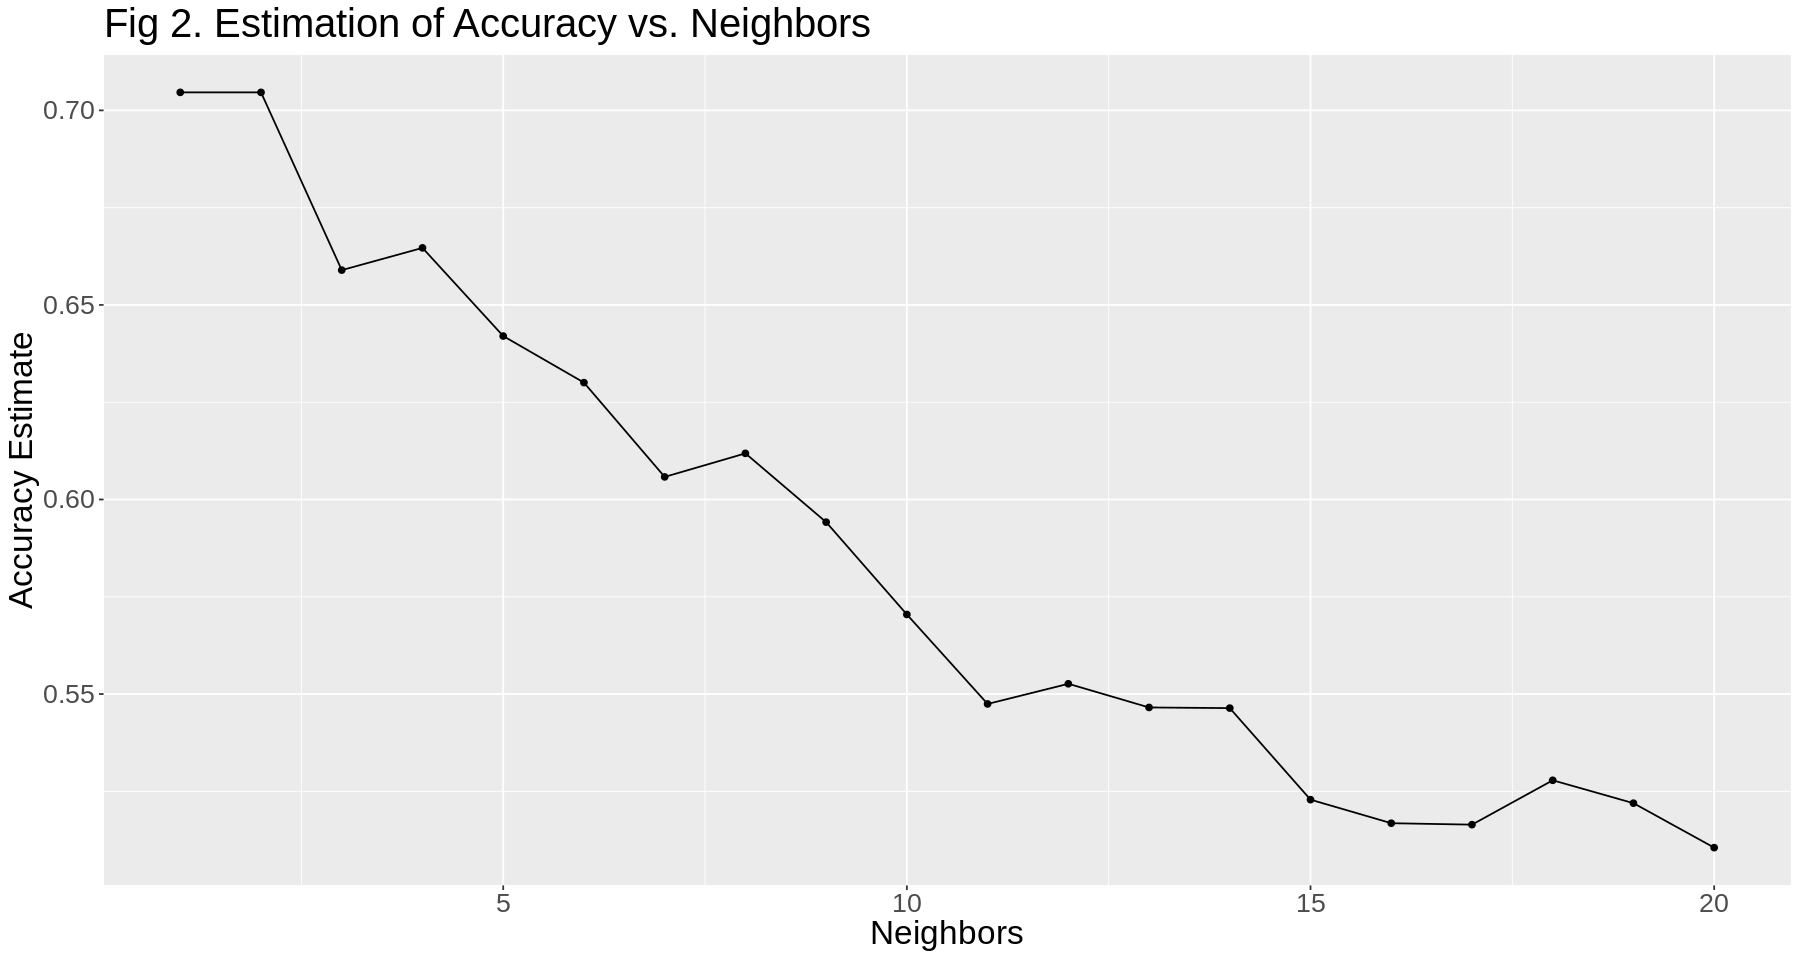

In [9]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 20)) +
  ggtitle("Fig 2. Estimation of Accuracy vs. Neighbors")
accuracy_vs_k

**Build the Model**<br>

Here we first extract the number of neighbours that gives us the highest accuracy based on the `accuracies` object created. The best number of neighbors is 1. We build our model specification with the best number of neigbhors then, pass the model specification and the training data set to the fit() function.

In [10]:
set.seed(999)

# Get the number of neighbors that gave the highest accuracy
best_neighbors <- accuracies$neighbors[which.max(accuracies$mean)]

# Build model specification with the best value for k
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_neighbors) |> 
            set_engine("kknn") |> 
            set_mode("classification") 

knn_fit <- workflow() |> 
            add_recipe(glass_recipe) |> 
            add_model(knn_spec) |> 
            fit(data = glass_train) 

**Predicting on the Test Data**<br>

We use our final model to predict on the test dataset and assign this to an object called `glass_test_predictions`. 

In [11]:
set.seed(999)

glass_test_predictions <- predict(knn_fit, glass_test) |> 
                            bind_cols(glass_test)

head(glass_test_predictions)

.pred_class,Na,Mg,Al,Si,K,Ca,glass_type
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
building_windows_float_processed,13.27,3.62,1.24,73.08,0.55,8.07,building_windows_float_processed
building_windows_non_float_processed,14.04,3.58,1.37,72.08,0.56,8.30,building_windows_float_processed
building_windows_float_processed,13.00,3.60,1.36,72.99,0.57,8.40,building_windows_float_processed
building_windows_non_float_processed,12.88,3.43,1.40,73.28,0.69,8.05,building_windows_float_processed
building_windows_float_processed,12.68,3.67,1.16,73.11,0.61,8.70,building_windows_float_processed
vehicle_windows_float_processed,12.98,3.54,1.21,73.00,0.65,8.53,building_windows_float_processed


<br>We report the accuracy of this prediction, and store this in an object named `glass_test_metrics`.

Here we can see that the accuracy of our model on the test dataset is 72.7%

In [12]:
set.seed(999)

glass_test_metrics <- glass_test_predictions |>
    metrics(truth = glass_type, estimate = .pred_class) |>
    select(-.estimator) |>
    filter(.metric == 'accuracy')

glass_test_metrics

.metric,.estimate
<chr>,<dbl>
accuracy,0.7272727


<br>We then report the confusion matrix and and store this in an object named `glass_test_conf_mat`.

In [13]:
set.seed(999)

glass_test_conf_mat <- glass_test_predictions |> 
    conf_mat(truth = glass_type, estimate = .pred_class)
glass_test_conf_mat

                                      Truth
Prediction                             building_windows_float_processed
  building_windows_float_processed                                   10
  building_windows_non_float_processed                                2
  vehicle_windows_float_processed                                     2
  containers                                                          0
  tableware                                                           0
  headlamps                                                           0
                                      Truth
Prediction                             building_windows_non_float_processed
  building_windows_float_processed                                        1
  building_windows_non_float_processed                                   12
  vehicle_windows_float_processed                                         1
  containers                                                              1
  tableware                 

<br> Additonally, we get the percentages of correct predictions for each `glass_type`. 

In [14]:
glass_test_pred_correct_pct <- glass_test_predictions |> 
    group_by(glass_type) |>
    summarize(correct_pred_pct = sum(.pred_class == glass_type)/n()) |>
    mutate(correct_pred_pct = round(correct_pred_pct * 100,digits = 2))

glass_test_pred_correct_pct

glass_type,correct_pred_pct
<fct>,<dbl>
building_windows_float_processed,71.43
building_windows_non_float_processed,75.00
vehicle_windows_float_processed,100.00
containers,100.00
tableware,25.00
headlamps,85.71


**Determine an Accuracy Baseline**

Here we determine an accuracy baseline based on a model that always chooses the most common class.

In [15]:
# Get the accuracy of the KNN model with the best number of neighbors
knn_accuracy <- accuracies$mean[which.max(accuracies$mean)]

# Implementing the Most Common Class model
# Create a table of class counts in the training data
class_counts <- table(glass_train$glass_type)
# Get the class with the highest count
most_common_class <- names(which.max(class_counts))
# Create a vector of predictions for the test data using the most common class
most_common_predictions <- rep(most_common_class, nrow(glass_test))
# Calculate the accuracy of the baseline model
most_common_accuracy <- mean(most_common_predictions == glass_test$glass_type)

# Create tibble with accuracies of both models
accuracy_tbl <- tibble(Model = c("KNN", "Most Common"),
                       Accuracy = c(knn_accuracy, most_common_accuracy))
accuracy_tbl

Model,Accuracy
<chr>,<dbl>
KNN,0.7046324
Most Common,0.3636364


The difference in accuracy between the k-NN model and the most common class baseline model provides valuable insights into the performance and effectiveness of our model. The k-NN model has an accuracy of approximately 70%, while the baseline model has an accuracy of approximately 36%. This indicates that the k-NN model is performing significantly better than the baseline model, successfully learning patterns from the data and making more informed predictions about the glass types. <br/>
The comparison between the two models evaluates whether the k-NN model is adding value and improving upon the approach of always predicting the most common class. With a difference of about 34 percentage points, the k-NN model demonstrates its ability to capture the relationships within the data, resulting in more accurate predictions. However, an accuracy of 70% for the k-NN model might still not be high enough.